# Exercise: Machine Learning Finding Optimal Model and Hyperparameters

For digits dataset in sklearn.dataset, please try following classifiers and find out the one that gives best performance. Also find the optimal parameters for that classifier.

    from sklearn import svm
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.tree import DecisionTreeClassifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

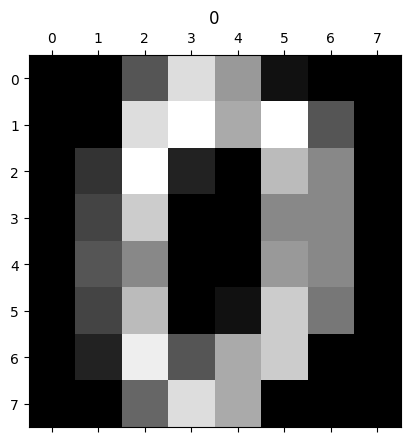

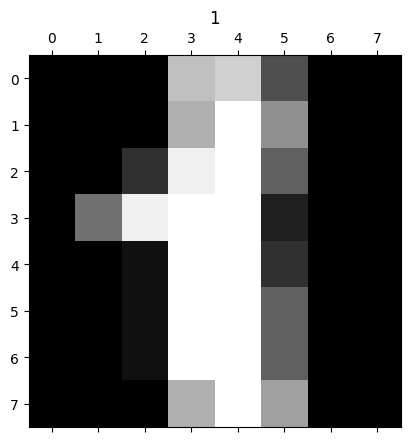

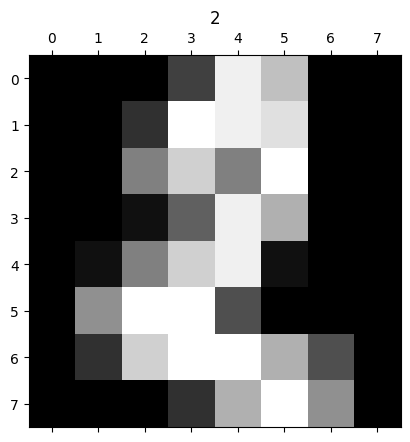

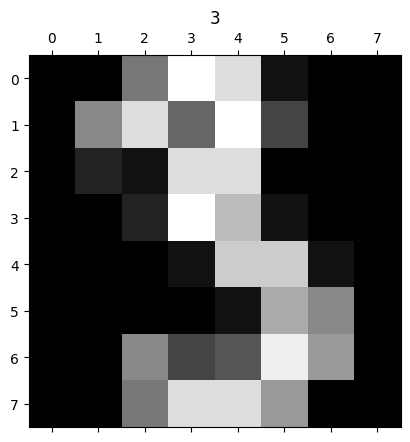

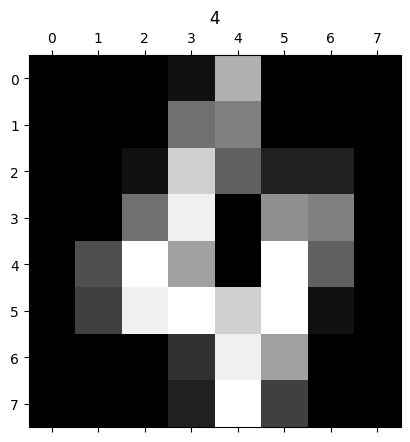

In [9]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])
    plt.title(digits.target[i])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, 
                                                   random_state=42)

In [34]:
model_params = {
    "svm" : {
        "model" : SVC(gamma='auto'),
        "params" : {
            "kernel" : ['linear', 'poly', 'rbf'],
            'C' : [1,5,10,20,30,50]
        }
    },
    
    'random forest' : {
        "model" : RandomForestClassifier(),
        "params" : {
            "n_estimators" : [5, 10, 20, 50, 100, 150],
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [None, 1,2,3]
        }
    },
    
    'logistic regression' : {
        'model' : LogisticRegression(),
        'params' : {
            'max_iter' : [300, 500, 1000]
        }
    },
    
    'Gaussian NB' : {
        'model' : GaussianNB(),
        'params' : {}
    },
    
    'Multinomial NB' : {
        'model' : MultinomialNB(),
        'params' : {}
    },
    
    'Decision Tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [None, 1,2,3]
        }
    }
}

In [35]:
kfold = StratifiedKFold(n_splits=5)

In [38]:
scores = []

for model, modelparams in model_params.items():
    grid = GridSearchCV(modelparams['model'], modelparams['params'], cv=kfold, 
                        return_train_score=False)
    grid.fit(X_train, y_train)
    scores.append({
        'model' : model,
        'best score' : grid.best_score_,
        'best parameters' : grid.best_params_
    })
griddf = pd.DataFrame(scores,columns=['model','best score','best parameters'])
griddf

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

,model,best score,best parameters
0,svm,0.988870,"{'C': 1, 'kernel': 'poly'}"
1,random forest,0.974252,"{'criterion': 'entropy', 'max_depth': None, 'n..."
2,logistic regression,0.956843,{'max_iter': 300}
3,Gaussian NB,0.829549,{}
4,Multinomial NB,0.894933,{}
5,Decision Tree,0.859437,"{'criterion': 'entropy', 'max_depth': None}"


In [40]:
griddf['best parameters'][1]

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}

In [41]:
model = SVC(C=1, kernel='poly')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9916666666666667

In [42]:
predict = model.predict(X_test)

Text(95.72222222222221, 0.5, 'Truth')

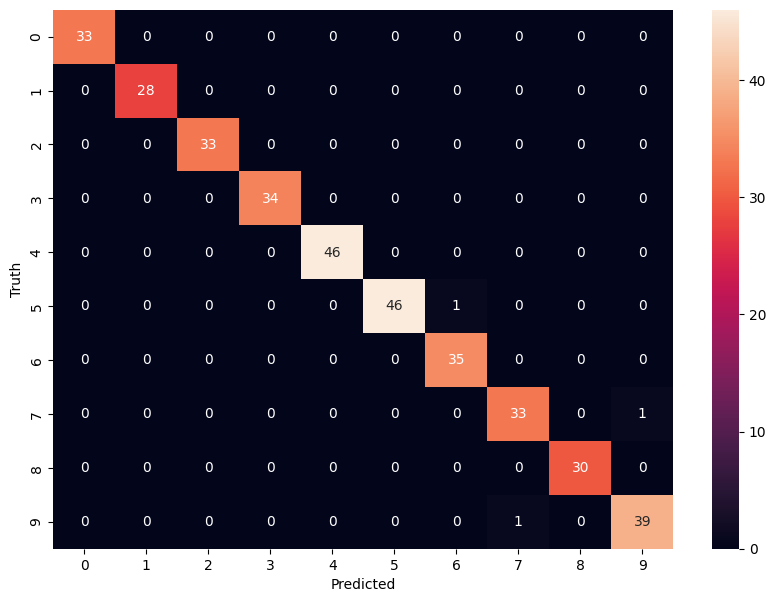

In [43]:
cm = confusion_matrix(y_test, predict)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# Hence best model is SVM with best params being C=1 and Kernel = "polynomial"